# Calculations - degrader foil thicknesses

In [1]:
%run SRIM_Ca48.ipynb

Max energy= 336000000.0
SRIM calculations of Ca-48 successful for the following target materials: ['Al', 'Ti', 'Graphite', 'PbS', 'Hf', 'Pu']

	Calculate energy loss as a function of traversed target material with function 'e_loss_x(E_init, x, target)'

	Calculate traversed target material as a function of energy loss 'x_loss_e(E_init, E_after, target)'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg
from matplotlib import colors
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'];
#Customising style
#mpl.rc('lines', linewidth=2, color='r')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['font.size'] = 24
#mpl.rcParams['savefig.format'] = "eps"
#mpl.rcParams['savefig.dpi'] = 100
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['figure.figsize'] = (16,9)

## Initialise general parameters

In [3]:
e_tank1 = 4.774 #MeV/u
e_tank2 = 5.893 #MeV/u
A = 48

## PbS for nobelium production

Ca-48 on Pb-207.

Beam energies at middle of target should be aimed for: 

* 4.53 MeV/u for 2n, i.e. No-253
* 4.73 MeV/u for 3n, i.e. No-252

This is according to Fritz Peter Hessberger, NUSTAR annual meeting 2010.

In [4]:
e_tank = e_tank1
target = "PbS"
degrader = "Al"
backing = "Graphite"

In [5]:
degrader_thickness = 0.76 # mg/cm2
degrader_thickness = 1e4*(degrader_thickness / 2.70e3) #µm
print(degrader_thickness)
degrader_thickness = 1*2 #µm

backing_thickness = 40 # µg/cm2 (according to Dirk)
backing_thickness = 1e4*(backing_thickness/2.15e6) # µm

target_thickness = 0.6 #mg/cm2 (according to Dirk)
target_thickness = 1e4*(target_thickness/7.60e3) # µm

2.8148148148148144


### Traversing material and calculating energy

In [6]:
E_of_X = [] #energies
X = [] # distance
E = e_tank*A
E_of_X.append(E)
X.append(0)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# degrader
E = E - e_loss_x(E, degrader_thickness, degrader)
E_of_X.append(E)
X.append(X[-1]+degrader_thickness)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# backing
E = E - e_loss_x(E, backing_thickness, backing)
E_of_X.append(E)
X.append(X[-1]+backing_thickness)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# target, middle and end
E = E - e_loss_x(E, target_thickness*0.5, target)
E_of_X.append(E)
X.append(X[-1]+target_thickness*0.5)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')
E = E - e_loss_x(E, target_thickness*0.5, target)
E_of_X.append(E)
X.append(X[-1]+target_thickness*0.5)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

E_of_X = np.asarray(E_of_X)
X = np.asarray(X)

E(0 µm)= 229.152 MeV 4.774 MeV/u
E(2 µm)= 220.1467955961782 MeV 4.58639157492038 MeV/u
E(2.186046511627907 µm)= 219.33783901604812 MeV 4.569538312834336 MeV/u
E(2.58078335373317 µm)= 216.70599943773732 MeV 4.514708321619527 MeV/u
E(2.9755201958384334 µm)= 214.06335180280195 MeV 4.459653162558374 MeV/u


In [7]:
stop_labels = ['start_degrader', 'start_backing', 'start_target', 'middle_target', 'end_target']

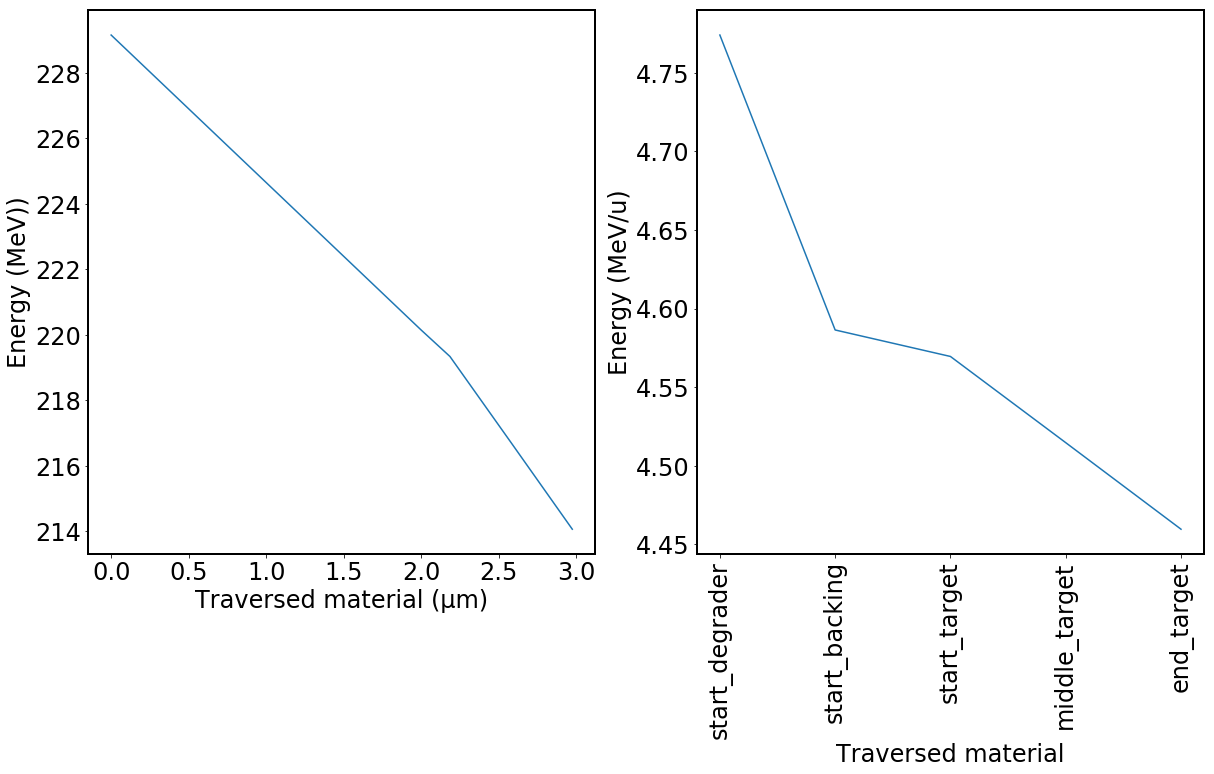

In [8]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].plot(X, E_of_X, label='E(X)')
axes[0].set_xlabel("Traversed material (µm)")
axes[0].set_ylabel('Energy (MeV))')
axes[1].plot(stop_labels, E_of_X/A, label='E(X)')
plt.xticks(rotation=90)
axes[1].set_xlabel("Traversed material")
axes[1].set_ylabel('Energy (MeV/u)')
plt.show()

## Hf for shortlived alpha-decaying nuclei

Ca-48 on Hf-nat.

Beam energies at middle of target should be aimed for: 

* 4.2 MeV/u

This is according to Andrew's calculations (got them from Dirk)

In [9]:
e_tank = e_tank1
target = "Hf"
degrader = "Al"
backing = "Ti"

In [10]:
degrader_thickness = 0.76 # mg/cm2
degrader_thickness = 1e4*(degrader_thickness / 2.70e3) #µm
print(degrader_thickness)
degrader_thickness = 0*2 #µm

backing_thickness = 0.82 # mg/cm2 (according to Dirk)
backing_thickness = 1e4*(backing_thickness/4.506e3) # µm
backing_thickness = 2.25 # µm

target_thickness = 0.83 #mg/cm2 (correspondence with Bettina Lommel)
target_thickness = 1e4*(target_thickness/13.31e3) # µm

2.8148148148148144


### Traversing material and calculating energy

In [11]:
E_of_X = [] #energies
X = [] # distance
E = e_tank*A
E_of_X.append(E)
X.append(0)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# degrader
E = E - e_loss_x(E, degrader_thickness, degrader)
E_of_X.append(E)
X.append(X[-1]+degrader_thickness)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# backing
E = E - e_loss_x(E, backing_thickness, backing)
E_of_X.append(E)
X.append(X[-1]+backing_thickness)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# target, middle and end
E = E - e_loss_x(E, target_thickness*0.5, target)
E_of_X.append(E)
X.append(X[-1]+target_thickness*0.5)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')
E = E - e_loss_x(E, target_thickness*0.5, target)
E_of_X.append(E)
X.append(X[-1]+target_thickness*0.5)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

E_of_X = np.asarray(E_of_X)
X = np.asarray(X)

E(0 µm)= 229.152 MeV 4.774 MeV/u
E(0 µm)= 229.1519999926598 MeV 4.773999999847079 MeV/u
E(2.25 µm)= 214.60005408808604 MeV 4.470834460168459 MeV/u
E(2.561795642374155 µm)= 211.1104637203194 MeV 4.398134660839987 MeV/u
E(2.8735912847483096 µm)= 207.60407232744853 MeV 4.325084840155178 MeV/u


In [12]:
stop_labels = ['start_degrader', 'start_backing', 'start_target', 'middle_target', 'end_target']

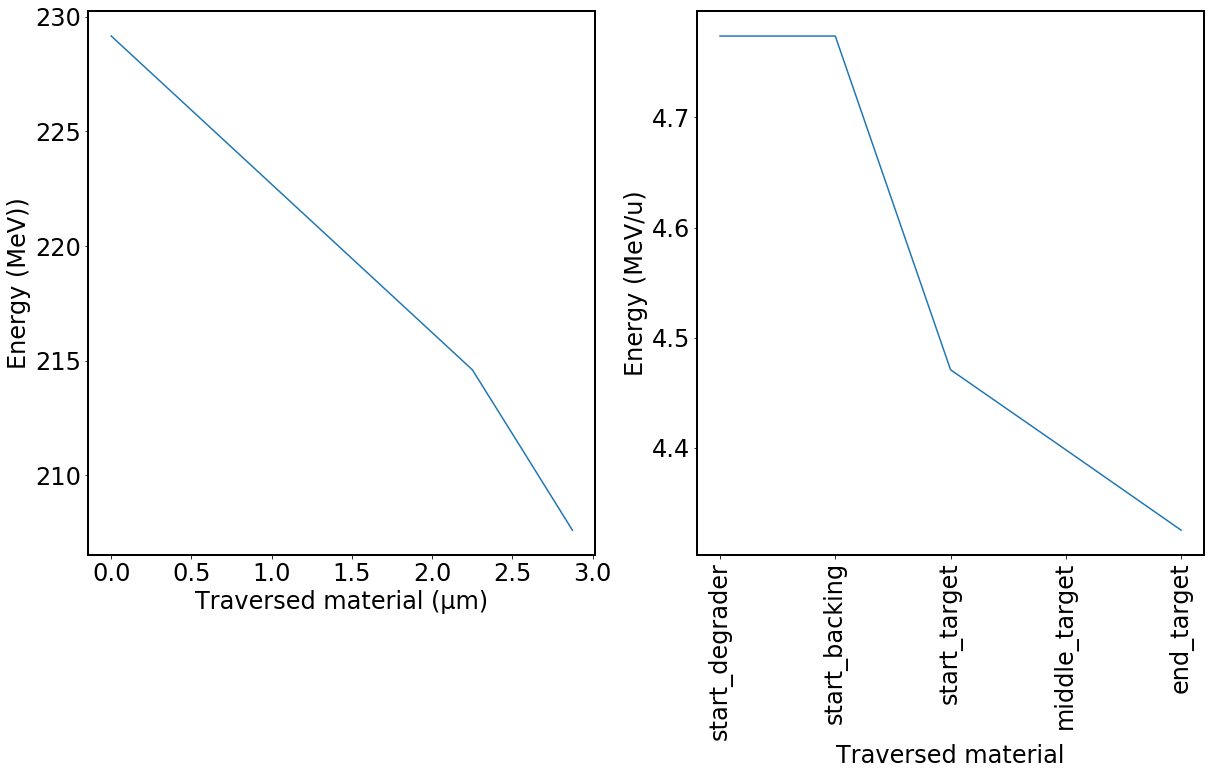

In [13]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].plot(X, E_of_X, label='E(X)')
axes[0].set_xlabel("Traversed material (µm)")
axes[0].set_ylabel('Energy (MeV))')
axes[1].plot(stop_labels, E_of_X/A, label='E(X)')
plt.xticks(rotation=90)
axes[1].set_xlabel("Traversed material")
axes[1].set_ylabel('Energy (MeV/u)')
plt.show()